<a href="https://colab.research.google.com/github/Caroline-Teixeira/imersao_python_dados/blob/colab/imers%C3%A3o_python_desafio_aula_5b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Desafio - Prophet - NVIDIA -feriados BR

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet

In [ ]:
# Baixar dados dos últimos 6 anos para uma ação específica
dados = yf.download("NVDA", start="2018-01-01", end="2023-12-31", progress=False)
dados = dados.reset_index()
dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,48.945000,49.875000,48.625000,49.837502,49.310486,35561600
1,2018-01-03,51.025002,53.424999,50.937500,53.117500,52.555798,91470400
2,2018-01-04,53.939999,54.512501,53.172501,53.397499,52.832821,58326800
3,2018-01-05,53.547501,54.227501,52.770000,53.849998,53.280540,58012400
4,2018-01-08,55.099998,56.250000,54.645000,55.500000,54.913097,88121600
...,...,...,...,...,...,...,...
1504,2023-12-22,491.950012,493.829987,484.670013,488.299988,488.277069,25213900
1505,2023-12-26,489.679993,496.000000,489.600006,492.790009,492.766907,24420000
1506,2023-12-27,495.109985,496.799988,490.850006,494.170013,494.146820,23364800
1507,2023-12-28,496.429993,498.839996,494.119995,495.220001,495.196777,24658700


Treino

In [ ]:
# Vamos dividir os dados em treino
# Dividir os dados em treino e teste (divisão trimestral)
dados_treino = dados[dados['Date'] < '2023-10-01']  # Treino até 30 de setembro de 2023
dados_teste = dados[dados['Date'] >= '2023-10-01']  # Teste a partir de 1 de outubro de 2023

In [ ]:
# Preparando os dados para o FBProphet
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})


In [ ]:
# Criar e treinar o modelo  # fit = aprenda
modelo = Prophet(weekly_seasonality=True,
        yearly_seasonality=True,
        daily_seasonality=False)

modelo.add_country_holidays(country_name='BR')

modelo.fit(dados_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3c1n_0vb/kvufr8lu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3c1n_0vb/y_k_wfwx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45221', 'data', 'file=/tmp/tmp3c1n_0vb/kvufr8lu.json', 'init=/tmp/tmp3c1n_0vb/y_k_wfwx.json', 'output', 'file=/tmp/tmp3c1n_0vb/prophet_model8pmfmj02/prophet_model-20240329170550.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:05:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:05:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Criar datas futuras para previsão até o final de 2023
futuro = modelo.make_future_dataframe(periods=150)
previsao = modelo.predict(futuro)

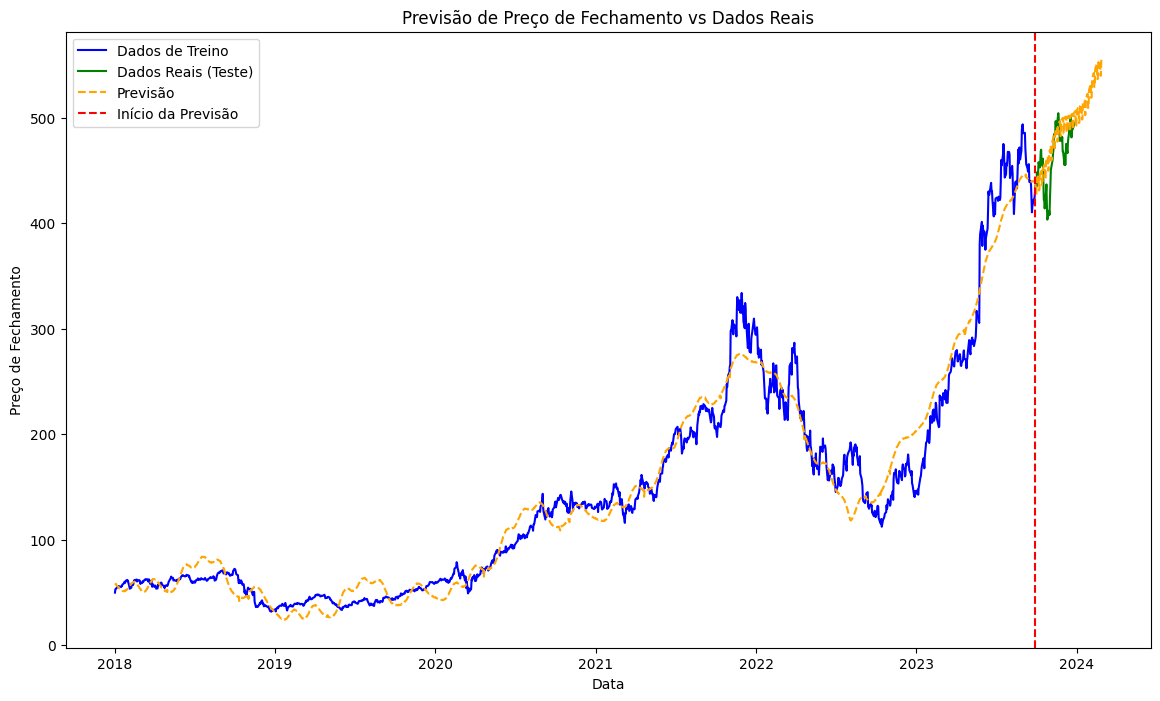

In [ ]:
# Plotar os dados de treino, teste e previsões
plt.figure(figsize=(14, 8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino', color='blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()